<a href="https://colab.research.google.com/github/mirrorball108/handwritten_digit_classification/blob/main/handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow import math
from sklearn.metrics import confusion_matrix

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(type(x_test))

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(x_train[11].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(28, 28)


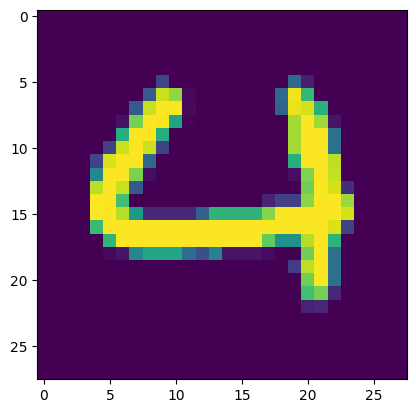

In [7]:
#display image
plt.imshow(x_train[60])
plt.show()

In [8]:
#display the corresponding label
print(y_train[60])

4


In [9]:
#unique values in y_train,y_test
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#all the images are of the same dimension, so we dont need to resize the imagines

#scaling the values to that the values only go from 0 to 1
#so processing is easier for the neural network, and gives us higher accuracy
#since values in the x can only go from 0 to 255 (strength of white since images aren't in RGB)

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
#scaling images
x_train=x_train/255
x_test=x_test/255
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#bulding the neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
                        ])
#the two dense layers represent the input and middlelayers
#the dense layer with 10 neurons is so because we have 10 possible unique outputs
#flatten transforms the matrix into a sigle dimensional array

In [13]:
#compiling the neural netwrok
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#training the neural network
model.fit(x_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1400 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0827 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

In [15]:
#accurcay in test data
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9725
0.9725000262260437


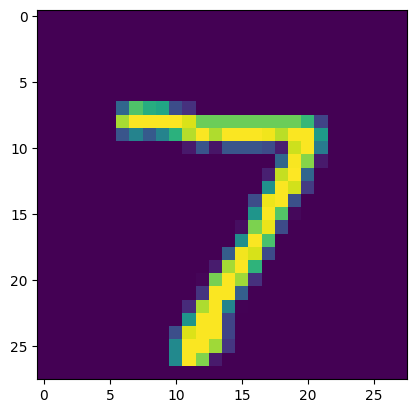

7
313/313 [==============================] - 1s 1ms/step
[1.7240561e-03 2.5295434e-03 8.0163163e-01 9.9634778e-01 1.1048047e-07
 1.5763713e-03 3.3628069e-08 9.9999893e-01 4.6490729e-02 2.9530244e-02]
7


In [16]:
#first data point
plt.imshow(x_test[0])
plt.show()

print(y_test[0])
y_pred=model.predict(x_test)
print(y_pred[0])
#model.predict gives porbability for each label (probability if the number is 0,1,2,3,4...)
#it does not return a single integer
#the integer with the maximum probability is our solution
#so we need to change how we receive the solution

#converting the prediction probabilities to the class label
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

In [17]:
#converting the prediction probabilities to the class label for all data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

[[ 972    0    2    2    0    0    2    0    1    1]
 [   0 1121    4    0    1    1    3    1    4    0]
 [   5    0 1012    1    1    0    3    5    5    0]
 [   0    1    4  991    1    2    0    5    6    0]
 [   1    0    1    1  975    0    1    0    1    2]
 [   5    0    1   31    3  822   12    2   12    4]
 [   7    1    0    0    2    1  946    0    1    0]
 [   2    5   14    8    3    0    0  988    1    7]
 [   2    0    7    8    1    3    6    4  940    3]
 [   2    3    0    7   21    0    1   11    6  958]]


Text(0.5, 47.7222222222222, 'Predicted labels')

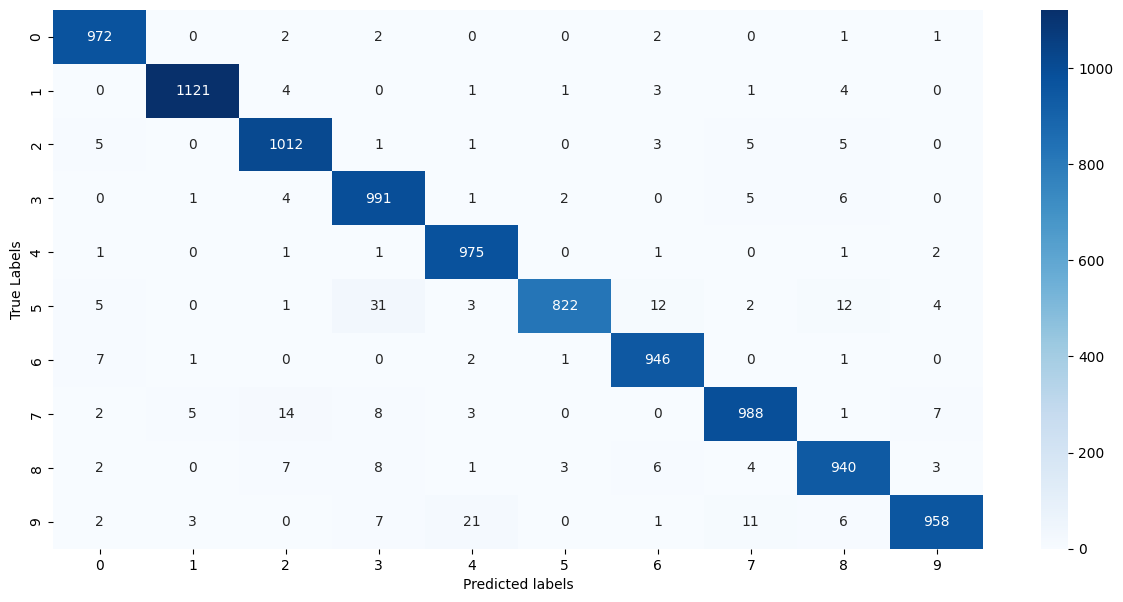

In [18]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

**Building a predictive system**

In [23]:
#buliding a predictive system
image_path='/content/download.png'
input_image=cv2.imread(image_path)
#statement above converst the image to a numpy array

(318, 318, 3)


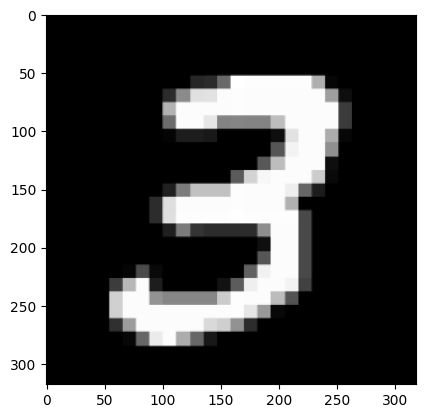

In [24]:
plt.imshow(input_image)
print(input_image.shape)
#shape returns 318x318x3
#the 3 shows that the image has been read as an RGB image
#the dimensions are also not compatible since our model is trained on 28x28

In [25]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
print(grayscale.shape)
#this gives 318x318 which means its not in RGB anymore

(318, 318)


In [26]:
input_image_resize=cv2.resize(grayscale,(28,28))
print(input_image_resize.shape)
#returns 28x28

(28, 28)


In [27]:
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

1/1 [==============================] - 0s 89ms/step
[[2.8196779e-12 8.5250940e-04 1.0100041e-02 1.0000000e+00 1.1294572e-10
  2.5230160e-01 1.4634260e-13 2.2435917e-01 2.4379360e-02 5.8359411e-02]]
3


**Final Predictive System**

path of the image to be predicted:/content/test.webp
1/1 [==============================] - 0s 19ms/step
the handwritten digit is recognised as :  3


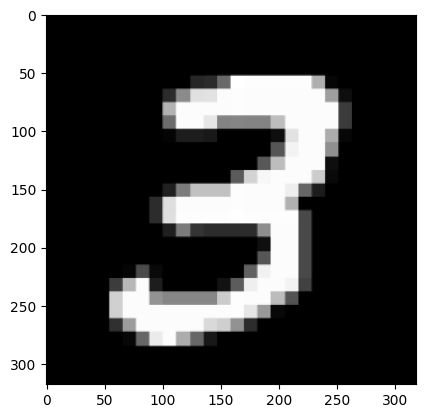

In [32]:

input_image_path=input('path of the image to be predicted:')
input_image=cv2.imread(image_path)
plt.imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('the handwritten digit is recognised as : ',input_pred_label)